Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

Data description - date,ad views,ad clicks,ad conversions,cost per ad,click through rate,conversion rate,cost per click

In [ ]:
df = pd.read_csv('/content/marketing_campaign.csv')

In [ ]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [ ]:
df.shape

(365, 17)

In [ ]:
df.dtypes

,0
Date,object
Facebook Ad Campaign,object
Facebook Ad Views,int64
Facebook Ad Clicks,int64
Facebook Ad Conversions,int64
Cost per Facebook Ad,object
Facebook Click-Through Rate (Clicks / View),object
Facebook Conversion Rate (Conversions / Clicks),object
Facebook Cost per Click (Ad Cost / Clicks),object
AdWords Ad Campaign,object


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


#Distribution of clicks and conversions

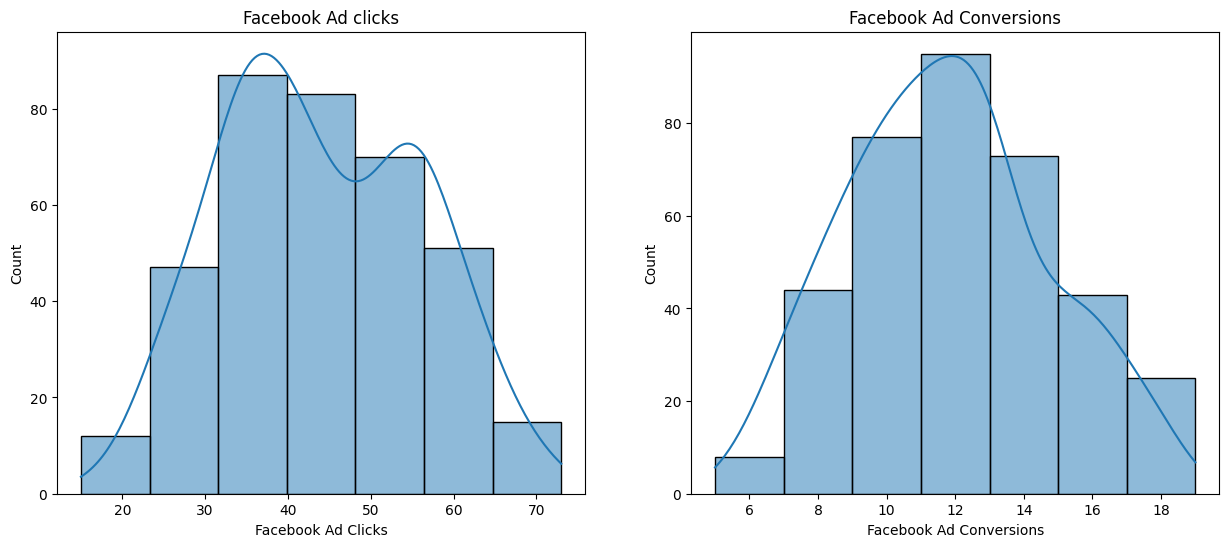

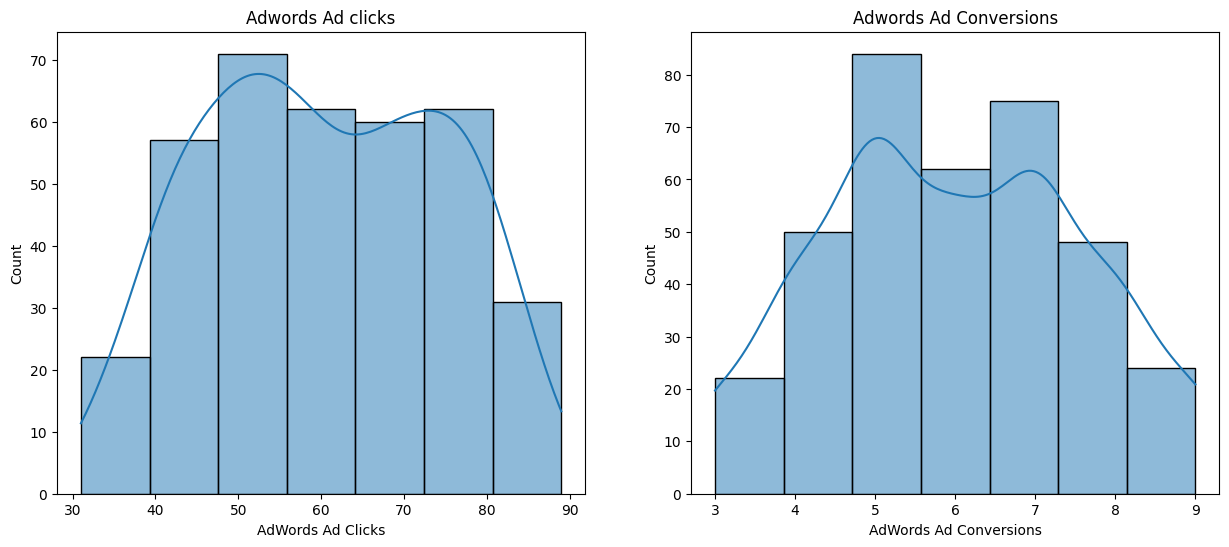

In [ ]:
plt.figure(figsize =(15,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad clicks')
sns.histplot(df['Facebook Ad Clicks'],bins =7,edgecolor ='k',kde = True)
plt.subplot(1,2,2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['Facebook Ad Conversions'],bins =7,edgecolor ='k',kde = True)
plt.show()

plt.figure(figsize =(15,6))
plt.subplot(1,2,1)
plt.title('Adwords Ad clicks')
sns.histplot(df['AdWords Ad Clicks'],bins =7,edgecolor ='k',kde = True)
plt.subplot(1,2,2)
plt.title('Adwords Ad Conversions')
sns.histplot(df['AdWords Ad Conversions'],bins =7,edgecolor ='k',kde = True)
plt.show()

No Outliers

How frequently do we observe days with high number of conversions than days with low number of conversions?

In [ ]:
df['Facebook Ad Conversions']

,Facebook Ad Conversions
0,8
1,12
2,8
3,9
4,7
...,...
360,13
361,18
362,13
363,8


In [ ]:
#creating fucntion to calculate category of conversions
def create_conversion_category(conversion_col):
  conversion_category = []
  for conversion in df[conversion_col]:
    if conversion <6:
      conversion_category.append('less than 6')
    elif 6<= conversion <11:
      conversion_category.append('6-10')
    elif 11 <= conversion <16:
      conversion_category.append('10-15')
    else:
      conversion_category.append('more than 15')
  return conversion_category # Corrected indentation

In [ ]:
df['Facebook conversion_category'] = create_conversion_category('Facebook Ad Conversions')
df['Adwords conversion_category'] = create_conversion_category('AdWords Ad Conversions')
df[['Facebook Ad Conversions','Facebook conversion_category','AdWords Ad Conversions','Adwords conversion_category']].head()

,Facebook Ad Conversions,Facebook conversion_category,AdWords Ad Conversions,Adwords conversion_category
0,8,6-10,5,less than 6
1,12,10-15,6,6-10
2,8,6-10,4,less than 6
3,9,6-10,5,less than 6
4,7,6-10,7,6-10


In [ ]:
df['Facebook conversion_category'].value_counts()

,count
Facebook conversion_category,
10-15,189
6-10,128
more than 15,47
less than 6,1


In [ ]:
df['Adwords conversion_category'].value_counts()

,count
Adwords conversion_category,
6-10,209
less than 6,156


In [ ]:
facebook = pd.DataFrame(df['Facebook conversion_category']).value_counts().reset_index().rename(columns ={'Facebook conversion_category':'Category'})
facebook

,Category,count
0,10-15,189
1,6-10,128
2,more than 15,47
3,less than 6,1


In [ ]:
adwords = pd.DataFrame(df['Adwords conversion_category']).value_counts().reset_index().rename(columns ={'Adwords conversion_category':'Category'})
adwords

,Category,count
0,6-10,209
1,less than 6,156


In [ ]:
category_df = pd.merge(facebook,adwords,on='Category',how='outer').fillna(0)
category_df

,Category,count_x,count_y
0,10-15,189,0.0
1,6-10,128,209.0
2,less than 6,1,156.0
3,more than 15,47,0.0


In [ ]:
category_df = category_df.set_index('Category').loc[['less than 6','6-10','10-15','more than 15']]
category_df

,count_x,count_y
Category,,
less than 6,1,156.0
6-10,128,209.0
10-15,189,0.0
more than 15,47,0.0


In [ ]:
X_axis = np.arange(len(category_df))
X_axis

array([0, 1, 2, 3])

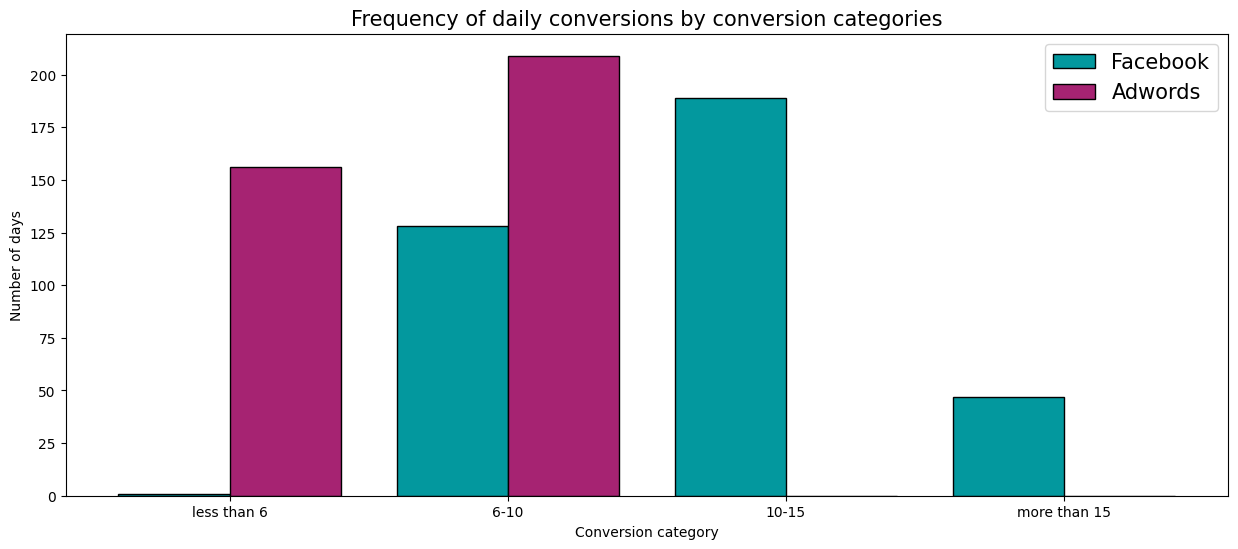

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(X_axis-0.2,category_df['count_x'],0.4,label='Facebook',color='#03989E',linewidth =1,edgecolor ='k')
plt.bar(X_axis+0.2,category_df['count_y'],0.4,label='Adwords',color = '#A62372',linewidth =1, edgecolor ='k')
plt.xticks(X_axis,category_df.index)
plt.xlabel("Conversion category")
plt.ylabel("Number of days")
plt.title("Frequency of daily conversions by conversion categories",fontsize =15)
plt.legend(fontsize =15)
plt.show()

Do more clicks on ADs leads to sales?

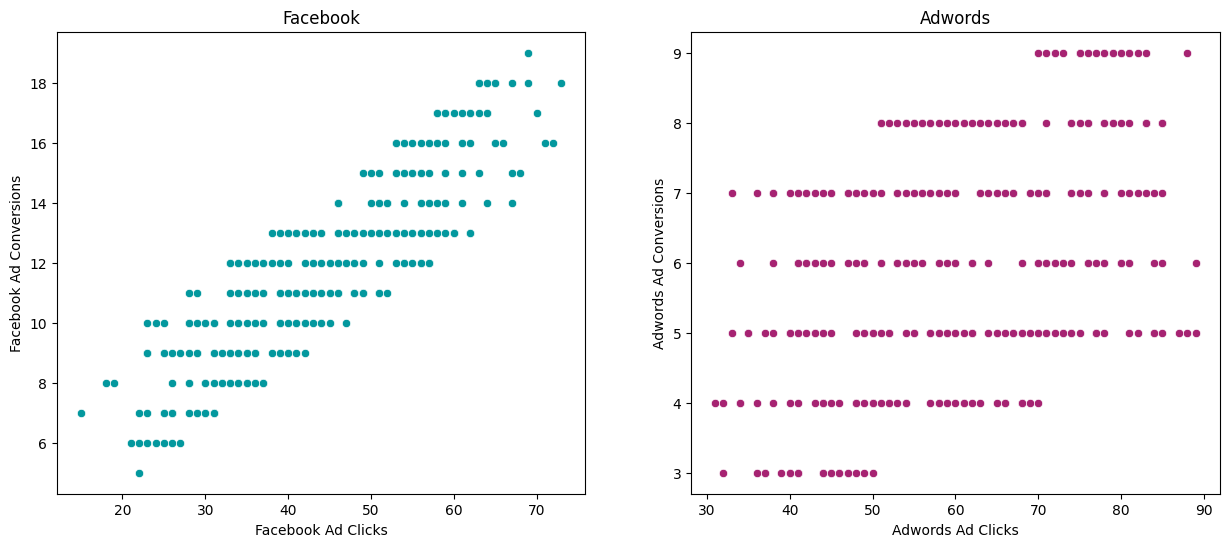

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook')
sns.scatterplot( x= df['Facebook Ad Clicks'],y =df['Facebook Ad Conversions'],color ='#03989E')
plt.xlabel('Facebook Ad Clicks')
plt.ylabel('Facebook Ad Conversions')
plt.subplot(1,2,2)
plt.title('Adwords')
sns.scatterplot( x= df['AdWords Ad Clicks'],y =df['AdWords Ad Conversions'],color ='#A62372')
plt.xlabel('Adwords Ad Clicks')
plt.ylabel('Adwords Ad Conversions')
plt.show()

In [ ]:
facebook_corr = df[['Facebook Ad Clicks','Facebook Ad Conversions']].corr()
facebook_corr

,Facebook Ad Clicks,Facebook Ad Conversions
Facebook Ad Clicks,1.000000,0.873775
Facebook Ad Conversions,0.873775,1.000000


In [ ]:
adwords_corr = df[['AdWords Ad Clicks','AdWords Ad Conversions']].corr()
adwords_corr

,AdWords Ad Clicks,AdWords Ad Conversions
AdWords Ad Clicks,1.000000,0.447993
AdWords Ad Conversions,0.447993,1.000000


In [ ]:
print("---Correlation Coefficients--")
print('Facebook', round(facebook_corr.values[0,1],2))
print('Adwords', round(adwords_corr.values[0,1],2))

---Correlation Coefficients--
Facebook 0.87
Adwords 0.45


0.87 - high correlation - strong + linear - click increase sales. highly attractive in sales - highly effective - higher sales.
0.45 - moderate + ve -though it can increase sales- but other factors needs to be analyzed for optimizing the campagin

Hypothesis testing

1. Hypothesis - Advertising on FB leads to greater number of Sales conversion than Adwords
2. Null - There is no difference between the conversions of FB & Adwords or number of conversions in Adwords is greter than FB
3. Alternate - No of conversios from FB is greter than no of conversions in AD words

In [ ]:
#Mean conversions
print("----Mean---")
print('Facebook:' ,round(df['Facebook Ad Conversions'].mean(),2))
print('Adwords:' ,round(df['AdWords Ad Conversions'].mean(),2))
from statsmodels.stats.weightstats import ttest_ind
t_stats,p_value, _  = ttest_ind(df['Facebook Ad Conversions'],df['AdWords Ad Conversions'])
print('t_stats:',t_stats)
print('p_value:',p_value)
#comparing p value with significant value
if p_value < 0.05:
  print('Reject null hypothesis')
else:
  print('Fail to reject null hypothesis')

----Mean---
Facebook: 11.74
Adwords: 5.98
t_stats: 32.88402060758184
p_value: 4.559680828599345e-146
Reject null hypothesis


FB mean > Adwords-  FB more effective - t_stats - measure of mean of two groups relative to variation within the groups. if it is large then it indicates larger difference between means
1. Consider reallocating resources towards FB than Adwords - involves - increasing AD spend,expanding targeted efforts,experimenting different ad formats to captilize platform's conversions


Regression analysis  - to check if I go with FB AD how many conversions can I expect for FB AD Clicks?

In [ ]:
#independent variable
X = df[['Facebook Ad Clicks']]
#dependent variable
y = df['Facebook Ad Conversions']
#reg model
reg = LinearRegression()
#fit the model
reg.fit(X,y)
predictions = reg.predict(X)
#model evaluation
r2 = r2_score(y,predictions)*100
mse = mean_squared_error(y,predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y,predictions)
print("Accuracy R2 score" , round(r2,2))
print("MSE",round(mse,2))
print("RMSE",round(rmse,2))
print("MAE",round(mae,2))

Accuracy R2 score 76.35
MSE 2.02
RMSE 1.42
MAE 1.22


[]

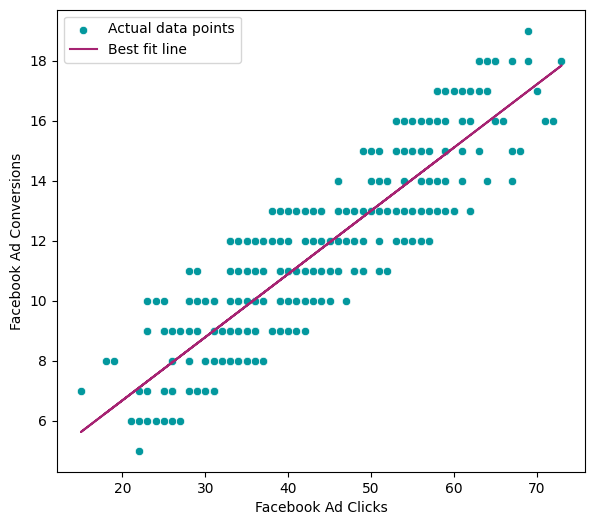

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(x=df['Facebook Ad Clicks'],y=df['Facebook Ad Conversions'],color ='#03989E',label ='Actual data points')
plt.plot(df['Facebook Ad Clicks'],predictions,color ='#A62372',label ='Best fit line')
plt.legend()
plt.plot()

In [ ]:
print(f' For {50} clicks,Expected Conversion: {round(reg.predict([[50]])[0],2)}')
print(f' For {100} clicks,Expected Conversion: {round(reg.predict([[100]])[0],2)}')

 For 50 clicks,Expected Conversion: 13.0
 For 100 clicks,Expected Conversion: 23.52


Model has a predictive power of 78% indicates that it can effectively predict FB AD conversions based on FB Clicks. This info can be used for Budget Planning, Resource Allocation and campagin Optimization

Analyzing FB Campagin metrics over months

In [ ]:
#cleaning data - removing unwanted symbols from columns and converting into numerical columns

# Check if the column is of object type before applying string manipulation
if df['Facebook Click-Through Rate (Clicks / View)'].dtype == 'object':
    df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].apply(lambda x: float(x[:-1]))
if df['Facebook Conversion Rate (Conversions / Clicks)'].dtype == 'object':
    df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(lambda x: float(x[:-1]))
if df['Facebook Cost per Click (Ad Cost / Clicks)'].dtype == 'object':
    df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].apply(lambda x: float(x[1:]))
if df['Cost per Facebook Ad'].dtype == 'object':
    df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].apply(lambda x: float(x[1:]))

if df['AdWords Click-Through Rate (Clicks / View)'].dtype == 'object':
    df['AdWords Click-Through Rate (Clicks / View)'] = df['AdWords Click-Through Rate (Clicks / View)'].apply(lambda x: float(x[:-1]))
if df['AdWords Conversion Rate (Conversions / Click)'].dtype == 'object':
    df['AdWords Conversion Rate (Conversions / Click)'] = df['AdWords Conversion Rate (Conversions / Click)'].apply(lambda x: float(x[:-1]))
if df['AdWords Cost per Click (Ad Cost / Clicks)'].dtype == 'object':
    df['AdWords Cost per Click (Ad Cost / Clicks)'] = df['AdWords Cost per Click (Ad Cost / Clicks)'].apply(lambda x: float(x[1:]))
if df['Cost per AdWords Ad'].dtype == 'object':
    df['Cost per AdWords Ad'] = df['Cost per AdWords Ad'].apply(lambda x: float(x[1:]))

In [ ]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook conversion_category,Adwords conversion_category
0,2019-01-01,FB_Jan19,2116,18,8,126.0,0.83,42.73,7.14,AW_Jan19,4984,59,5,194.0,1.18,8.40,3.30,6-10,less than 6
1,2019-01-02,FB_Jan19,3106,36,12,104.0,1.15,34.04,2.91,AW_Jan19,4022,71,6,75.0,1.77,7.80,1.05,10-15,6-10
2,2019-01-03,FB_Jan19,3105,26,8,102.0,0.84,31.45,3.89,AW_Jan19,3863,44,4,141.0,1.13,9.59,3.23,6-10,less than 6
3,2019-01-04,FB_Jan19,1107,27,9,71.0,2.45,34.76,2.62,AW_Jan19,3911,49,5,141.0,1.26,11.08,2.86,6-10,less than 6
4,2019-01-05,FB_Jan19,1317,15,7,78.0,1.10,47.59,5.38,AW_Jan19,4070,55,7,133.0,1.36,12.22,2.40,6-10,6-10


In [ ]:
df.dtypes

,0
Date,datetime64[ns]
Facebook Ad Campaign,object
Facebook Ad Views,int64
Facebook Ad Clicks,int64
Facebook Ad Conversions,int64
Cost per Facebook Ad,float64
Facebook Click-Through Rate (Clicks / View),float64
Facebook Conversion Rate (Conversions / Clicks),float64
Facebook Cost per Click (Ad Cost / Clicks),float64
AdWords Ad Campaign,object


In [ ]:
#filter out Face book ADs
df = df[['Date','Facebook Ad Campaign','Facebook Ad Views','Facebook Ad Clicks','Facebook Ad Conversions','Facebook Click-Through Rate (Clicks / View)','Facebook Conversion Rate (Conversions / Clicks)','Facebook Cost per Click (Ad Cost / Clicks)','Cost per Facebook Ad']]

In [ ]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),Cost per Facebook Ad
0,2019-01-01,FB_Jan19,2116,18,8,0.83,42.73,7.14,126.0
1,2019-01-02,FB_Jan19,3106,36,12,1.15,34.04,2.91,104.0
2,2019-01-03,FB_Jan19,3105,26,8,0.84,31.45,3.89,102.0
3,2019-01-04,FB_Jan19,1107,27,9,2.45,34.76,2.62,71.0
4,2019-01-05,FB_Jan19,1317,15,7,1.10,47.59,5.38,78.0


At what days of month do we observe conversions ?


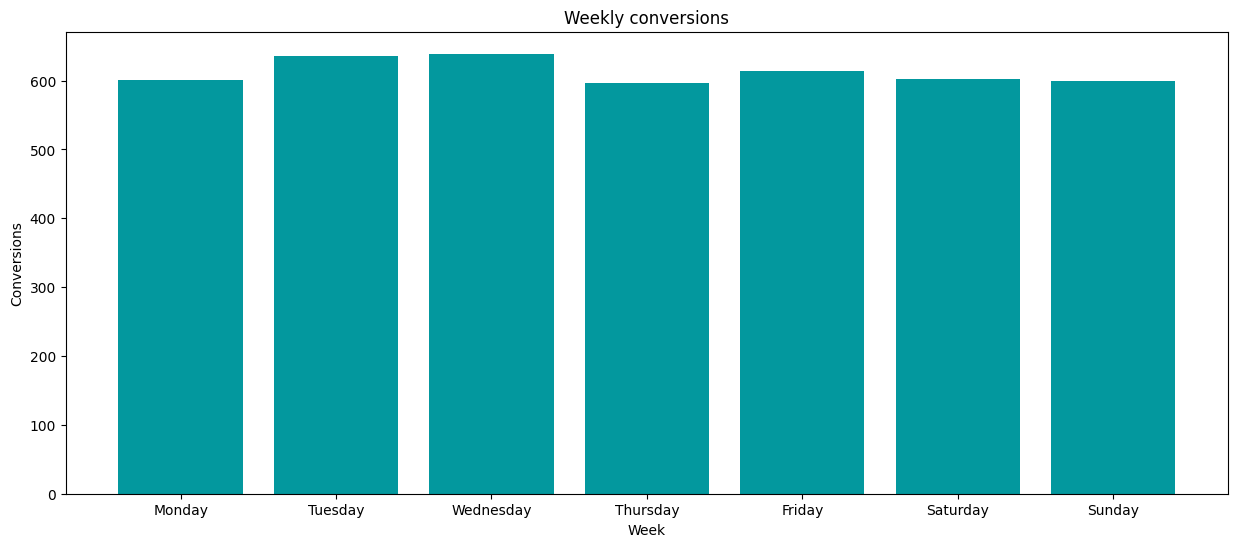

In [ ]:
#extracting month and week
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.weekday
plt.figure(figsize =(15,6))
plt.title('Weekly conversions')
week_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

weekly_conversion= df.groupby('Week')['Facebook Ad Conversions'].sum().reset_index()
plt.bar(week_names,weekly_conversion['Facebook Ad Conversions'],color ='#03989E')
plt.xlabel('Week')
plt.ylabel('Conversions')
plt.show()

Across week conversions remains consistent with mon and tues as highest conversion rate- beginning of week indicates higher user engagement and responsiveness

Text(0, 0.5, 'Conversions')

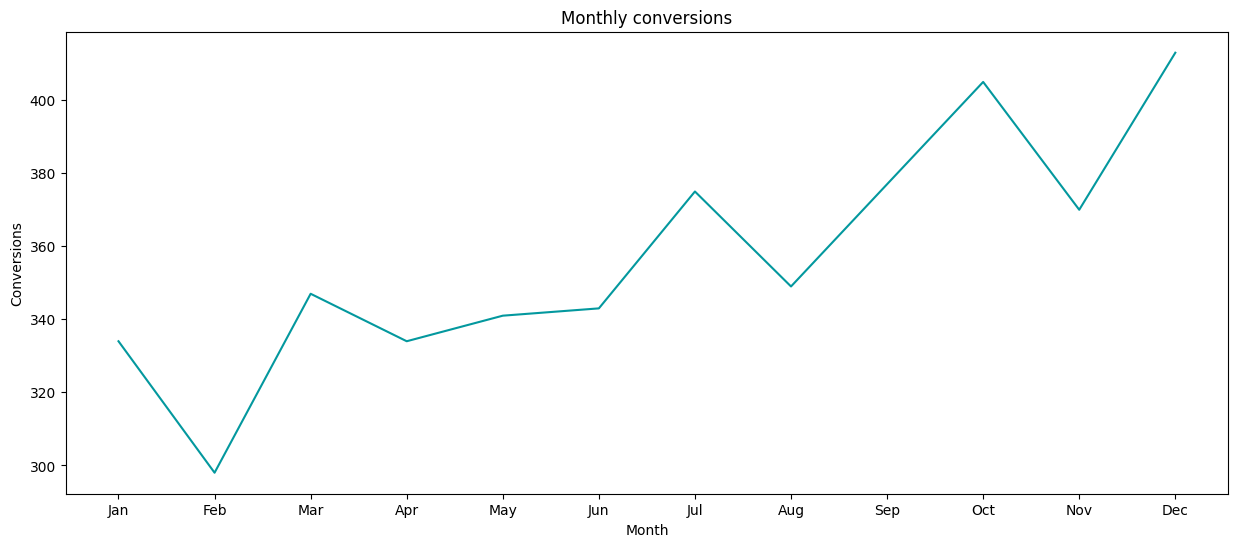

In [ ]:
#Monthly conversions
plt.figure(figsize =(15,6))
plt.title('Monthly conversions')
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_conversion= df.groupby('Month')['Facebook Ad Conversions'].sum().reset_index()
plt.plot(month_names,monthly_conversion['Facebook Ad Conversions'],color ='#03989E')
plt.xlabel('Month')
plt.ylabel('Conversions')

Overall Upward trajectory for all months with certain months standing out in variations - variations - seasonal fluctations, market uncertainties, changes in customer behaviour.

**Cost of conversion trend over time*

measures cost effectiveness and profitability of online advertising campagin- gives an idea of how much they are spending for each conversion

Text(0, 0.5, 'Cost per conversion')

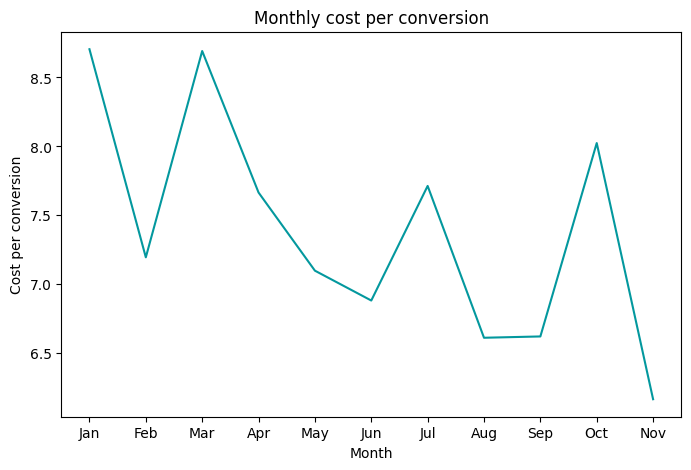

In [ ]:
plt.figure(figsize =(8,5))
plt.title('Monthly cost per conversion')
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_df = df.groupby('Month')[['Facebook Ad Conversions','Cost per Facebook Ad']].sum()
monthly_df['Cost per conversion'] = monthly_df['Cost per Facebook Ad']/monthly_conversion['Facebook Ad Conversions']
plt.plot(month_names,monthly_df['Cost per conversion'],color ='#03989E')
plt.xlabel('Month')
plt.ylabel('Cost per conversion')

1. aug & Nov has lowest CPC value - low cost - effective campagin
2. low CPC - higher effectiveness
3. allocate more budget to months with low CPC



CO-INTEGRATION TEST

Long relationship btw advertising and conversion rate - proportional impact of budget changes over conversions over time

1. Null hyptothesis - there is no equilibrium or long term relationship between cost and conversion
2. Alternate - there is an equilibrium btw cost and conversion

In [ ]:
score, p_value, critical_values = coint(df['Cost per Facebook Ad'],df['Facebook Ad Conversions'])
print('score:',score)
print('p_value:',p_value)
print('critical_values:', critical_values)
if p_value < 0.05:
  print('Reject null hypothesis')
else:
  print('Fail to reject null hypothesis')

score: -14.755428385103219
p_value: 2.1337375979061323e-26
critical_values: [-3.92678068 -3.35296748 -3.05612218]
Reject null hypothesis


Conclusion - company can adjust spending based on performance by using the relationship between cost and conversion and optimize their advertising stratergies.